# Tayko Regression

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Dataset

In [ ]:
df = pd.read_csv("Tayko.csv")

# Explore Dataset

พิจารณาแค่ Row ที่มี Purchase=1

In [ ]:
df = df[df["Purchase"] == 1]

In [ ]:
df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Partition,Unnamed: 26,Unnamed: 27
0,1,1,0,0,1,0,0,0,0,0,...,3662,3662,1,0,1,1,128,s,NaN,NaN
2,3,1,0,0,0,0,0,0,0,0,...,3883,3914,0,0,0,1,127,t,NaN,NaN
8,9,1,1,0,0,0,0,0,0,0,...,525,2914,1,1,0,1,489,t,NaN,NaN
9,10,1,1,0,0,0,0,0,0,0,...,3215,3215,0,0,0,1,174,v,NaN,NaN
13,14,1,1,0,0,0,0,0,0,0,...,2081,2438,0,1,0,1,1416,v,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 26","Unnamed: 27"], axis=1)

In [ ]:
df.dtypes

sequence_number          int64
US                       int64
source_a                 int64
source_c                 int64
source_b                 int64
source_d                 int64
source_e                 int64
source_m                 int64
source_o                 int64
source_h                 int64
source_r                 int64
source_s                 int64
source_t                 int64
source_u                 int64
source_p                 int64
source_x                 int64
source_w                 int64
Freq                     int64
last_update_days_ago     int64
1st_update_days_ago      int64
Web order                int64
Gender=male              int64
Address_is_res           int64
Purchase                 int64
Spending                 int64
Partition               object
dtype: object

In [ ]:
df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,963.5360,0.833000,0.197000,0.044000,0.036000,0.047000,0.134000,0.019000,0.013000,0.01200,...,0.017000,0.154000,2.077000,1975.010000,2475.384000,0.544000,0.514000,0.223000,1.0,205.249000
std,584.7072,0.373162,0.397931,0.205198,0.186383,0.211745,0.340823,0.136593,0.113331,0.10894,...,0.129336,0.361129,1.598633,1118.469756,1032.463509,0.498309,0.500054,0.416467,0.0,220.739559
min,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,3.000000
25%,436.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,1027.750000,1790.750000,0.000000,0.000000,0.000000,1.0,94.750000
50%,951.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,2.000000,1995.000000,2612.500000,1.000000,1.000000,0.000000,1.0,153.000000
75%,1485.2500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,2.250000,2912.000000,3270.000000,1.000000,1.000000,0.000000,1.0,233.750000
max,1997.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.0,1500.000000


In [ ]:
df.isnull().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
Partition               0
dtype: int64

ทำการแบ่งประเภท Column เป็น Numerical Column และ Categorical Column โดย Numerical Column จะใช้การแสดงข้อมูลแบบ Histogram ส่วน Categorical Column จะใช้ Count Plot ในการแสดงข้อมูล

In [ ]:
numerical_columns = df.select_dtypes(include=["number"]).columns.tolist()
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
binary_columns = df.columns[df.nunique() == 2]

numerical_columns.remove("sequence_number")
numerical_columns.remove("Purchase")
numerical_columns = [column for column in numerical_columns if column not in binary_columns]

categorical_columns.extend(binary_columns)

print("numerical columns: ", numerical_columns)
print("categorical columns: ", categorical_columns)
print("binary columns: ", binary_columns)

numerical columns:  ['Freq', 'last_update_days_ago', '1st_update_days_ago', 'Spending']
categorical columns:  ['Partition', 'US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Web order', 'Gender=male', 'Address_is_res']
binary columns:  Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Web order',
       'Gender=male', 'Address_is_res'],
      dtype='object')


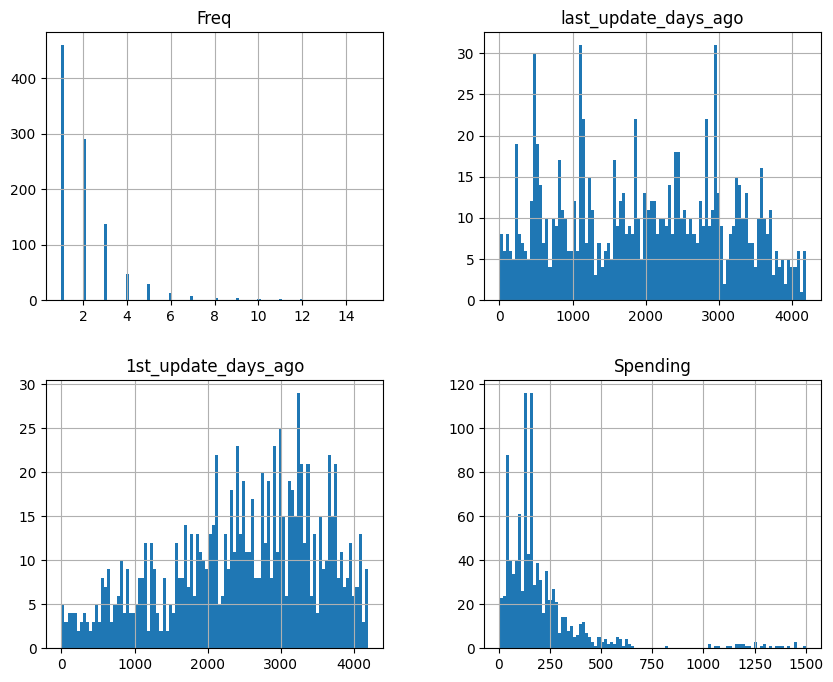

In [ ]:
df[numerical_columns].hist(bins=100, figsize=(10,8))
plt.show()

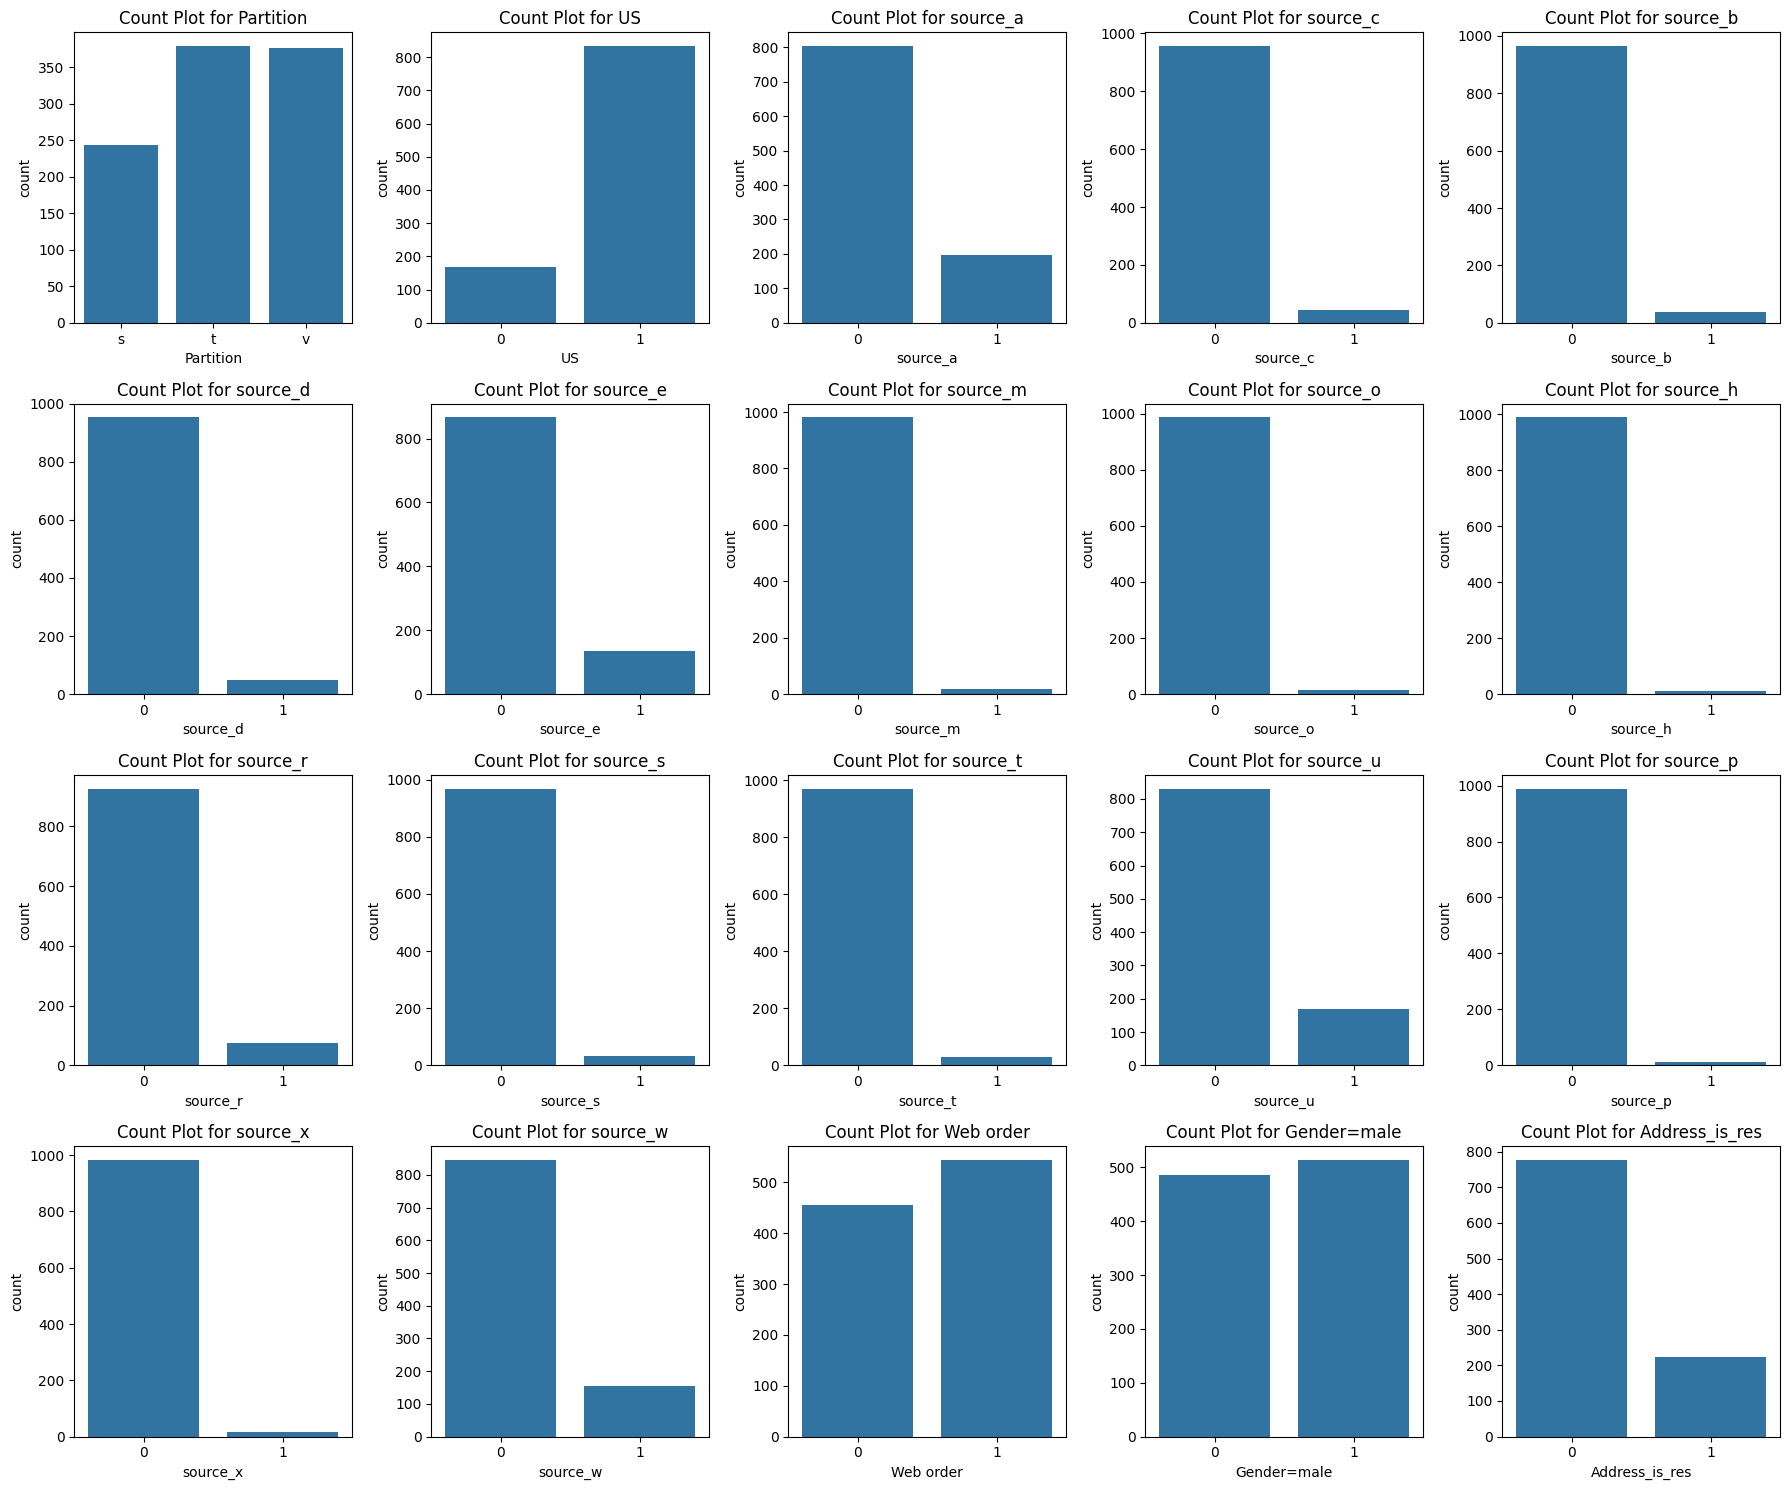

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 15))
axes = axes.flatten()

for i, category in enumerate(categorical_columns):
    sns.countplot(x=category, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot for {category}')

plt.tight_layout()

# a.) Explore the Relationship (Spending vs Freq and Spending vs Last Update)

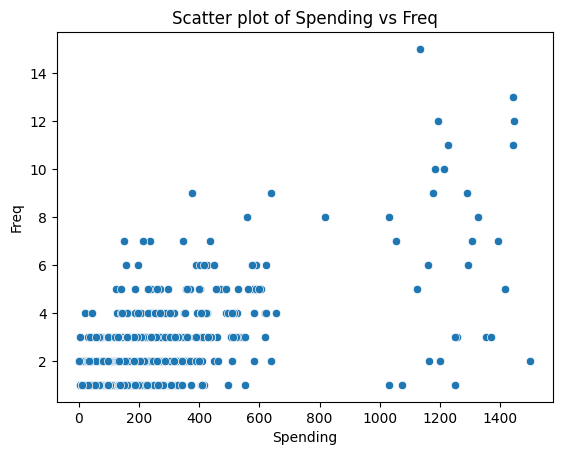

In [ ]:
sns.scatterplot(data=df, x="Spending", y="Freq")
plt.title("Scatter plot of Spending vs Freq")
plt.show()

In [ ]:
correlation = df["Spending"].corr(df["Freq"])
print(f"Correlation between Spending and Freq: {correlation}")

Correlation between Spending and Freq: 0.6447415172708857


จาก Scatter Plot of Spending vs Freq พบว่าพอจะมีความสัมพันธ์อยู่บ้างแบบ Positive Linear Relationship แต่อาจจะไม่ชัดเจนเท่าไหร่ และเมื่อลองคำนวณค่า Correlation ก็จะพบว่าเป็นการยืนยันสมมติฐานที่ถูกต้อง

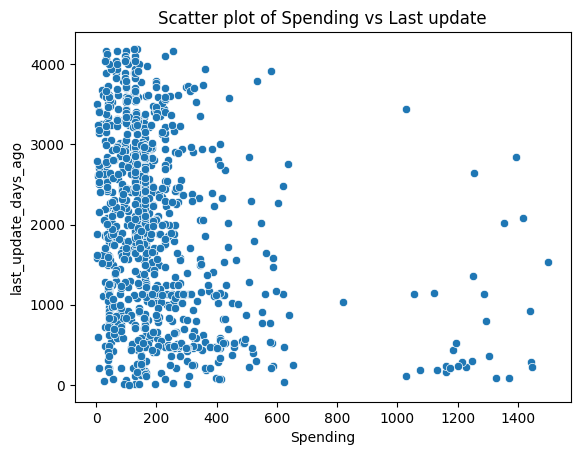

In [ ]:
sns.scatterplot(data=df, x="Spending", y="last_update_days_ago")
plt.title("Scatter plot of Spending vs Last update")
plt.show()

In [ ]:
correlation = df["Spending"].corr(df["last_update_days_ago"])
print(f"Correlation between Spending and Last update: {correlation}")

Correlation between Spending and Last update: -0.29401614962876177


จาก Scatter Plot of Spending vs Last Update เมื่อมองด้วยตาเปล่า อาจจะไม่เห็นความสัมพันธ์ที่ชัดเจนนัก แต่เมื่อลองคำนวณค่า Correlation ก็จะพบว่าทั้งคู่มีความสัมพันธ์แบบ Negative Correlation แต่อาจจะไม่มาก ทำให้มองด้วยตาเปล่าได้ไม่ชัดเจน จึงสามารถสรุปได้ว่าทั้งคู่มี Negative Linear Relationship เพียงเล็กน้อย

# b.) Fitting First Model

# b.1) Partition into Training and Test Sets

## Splitting the Dataset into the Training Set and Test Set

In [ ]:
predictors = ["Freq", "last_update_days_ago", "Web order", "Gender=male", "US", "Address_is_res"]

In [ ]:
X_train = df.loc[df["Partition"] == "t", predictors]
X_train

,Freq,last_update_days_ago,Web order,Gender=male,US,Address_is_res
2,2,3883,0,0,1,0
8,4,525,1,1,1,0
18,2,1879,1,1,1,1
21,2,1928,0,1,1,0
23,2,1463,0,0,1,1
...,...,...,...,...,...,...
1987,1,695,1,0,0,0
1990,3,1415,1,1,1,1
1991,1,2807,0,1,1,0
1994,2,1136,0,1,1,0


In [ ]:
X_test= df.loc[df["Partition"] == "v", predictors]
X_test

,Freq,last_update_days_ago,Web order,Gender=male,US,Address_is_res
9,1,3215,0,0,1,0
13,5,2081,0,1,1,0
28,1,3299,0,0,1,0
31,2,2947,1,0,0,0
44,2,2752,0,1,1,0
...,...,...,...,...,...,...
1974,1,1708,0,0,0,0
1985,1,659,1,1,1,0
1986,4,1710,0,0,1,1
1988,1,3299,1,1,1,0


In [ ]:
y_train = df.loc[df["Partition"] == "t", ["Spending"]]
y_train

,Spending
2,127
8,489
18,130
21,161
23,174
...,...
1987,58
1990,130
1991,55
1994,184


In [ ]:
y_test = df.loc[df["Partition"] == "v", ["Spending"]]
y_test

,Spending
9,174
13,1416
28,90
31,352
44,638
...,...
1974,98
1985,188
1986,145
1988,69


# b.2) Run a Multiple Regression Model

## Feature Scaling on Training Set

ทำการ Scaling เฉพาะตัวแปรที่เป็น Continuous เท่านั้น ซึ่งได้แก่ `Freq` และ `last_update_days_ago` ส่วนตัวแปรที่เป็น Binary ไม่จำเป็นต้องทำการ Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
selected_columns = ["Freq", "last_update_days_ago"]

In [ ]:
X_train[selected_columns] = sc.fit_transform(X_train[selected_columns])
X_train

,Freq,last_update_days_ago,Web order,Gender=male,US,Address_is_res
2,-0.092484,1.719329,0,0,1,0
8,1.095703,-1.268996,1,1,1,0
18,-0.092484,-0.064055,1,1,1,1
21,-0.092484,-0.020449,0,1,1,0
23,-0.092484,-0.434258,0,0,1,1
...,...,...,...,...,...,...
1987,-0.686578,-1.117711,1,0,0,0
1990,0.501609,-0.476974,1,1,1,1
1991,-0.686578,0.761784,0,1,1,0
1994,-0.092484,-0.725260,0,1,1,0


In [ ]:
X_test[selected_columns] = sc.fit_transform(X_test[selected_columns])
X_test

,Freq,last_update_days_ago,Web order,Gender=male,US,Address_is_res
9,-0.692702,1.125512,0,0,1,0
13,1.905792,0.090423,0,1,1,0
28,-0.692702,1.202186,0,0,1,0
31,-0.043078,0.880888,1,0,0,0
44,-0.043078,0.702897,0,1,1,0
...,...,...,...,...,...,...
1974,-0.692702,-0.250043,0,0,0,0
1985,-0.692702,-1.207546,1,1,1,0
1986,1.256169,-0.248217,0,0,1,1
1988,-0.692702,1.202186,1,1,1,0


## Training First Model Using Multiple Linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

print(model.coef_)
print(model.intercept_)
print("Features :", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

[[155.95020921 -28.21799529   1.54094366   4.30520709  42.81534477
  -92.83312944]]
[190.06872042]
Features : ['Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'US', 'Address_is_res']
Coefficients: [[155.95020921 -28.21799529   1.54094366   4.30520709  42.81534477
  -92.83312944]]
Intercept : [190.06872042]


จะได้ Regression Equation คือ `Spending = 190.06872042 + (Freq * 155.95020921) + (last_update_days_ago * -28.21799529) + (Web order * 1.54094366) + (Gender=male * 4.30520709) + (US * 42.81534477) + (Address_is_res * -92.83312944)`

## RMSE evaluation

In [ ]:
import math

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("RMSE = ", rmse)

RMSE =  164.75931043371457


# b.3) Identify the Characteristics of High Spending Buyers

เมื่อสังเกตจาก Regression Equation แล้ว จะพบว่าค่าของ Coefficient ใน Predictors ต่างๆ ส่งผลโดยตรงกับค่า `Spending` ที่ Predict ได้ หรือก็คือยิ่ง Coefficient มีค่าเป็นบวกมากๆ จะยิ่งส่งผลให้มี `Spending` ที่สูง และในทางกลับกันยิ่ง Coefficient มีค่าเป็นลบมากๆ `Spending` ก็จะมีค่าที่ต่ำเช่นเดียวกัน และเมื่อลองพิจารณาจาก Coefficient ที่คำนวณได้ใน First Model


`Freq = 155.95020921`<br>
`last_update_days_ago = -28.21799529`<br>
`Web order = 1.54094366`<br>
`Gender=male = 4.30520709`<br>
`US = 42.81534477`<br>
`Address_is_res = -92.83312944`<br>

พบว่ามี 4 Predictors ที่ส่งผลอย่างชัดเจนกับค่า Spending คือ `Freq`, `last_update_days_ago`, `US` และ `Address_is_res` ส่วนอีก 2 Predictors คือ `Web order` และ `Gender=male` ส่งผลน้อยมากๆ กับ Model

เมื่อพิจารณาเฉพาะ 4 Predictors ที่ส่งผลอย่างมีนัยยะสำคัญกับ Regression Equation แล้ว จึงสามารถสรุปได้ดังนี้ Buyers ที่มีค่า Spending ที่สูง จะมีค่า `Freq` และ `US` สูง ส่วนค่า `last_update_days_ago` และ `Address_is_res` จะมีค่าที่ต่ำ (`last_update_days_ago` และ `Address_is_res` ไม่ได้ช่วยเพิ่มค่า `Spending` โดยตรง แต่ไม่ทำให้ค่า Spending น้อยลง)

In [ ]:
import statsmodels.api as sm

X = df[predictors]
y = df["Spending"]
A = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Spending   R-squared (uncentered):                   0.698
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              382.6
Date:                Sun, 28 Jul 2024   Prob (F-statistic):                   3.03e-254
Time:                        03:28:35   Log-Likelihood:                         -6528.8
No. Observations:                1000   AIC:                                  1.307e+04
Df Residuals:                     994   BIC:                                  1.310e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
model.pvalues

Freq                    3.503150e-150
last_update_days_ago     1.220180e-01
Web order                1.859609e-01
Gender=male              2.959738e-01
US                       1.274003e-01
Address_is_res           2.856026e-09
dtype: float64

ในการพิจารณาค่า P-value เราจะกำหนดให้ Null Hypothesis คือ Predictor ต่างๆ ไม่มีความสัมพันธ์กับ `Spending` โดยหาก `P-value <= 0.05` สรุปได้ว่า Reject Null Hypothesis แต่หาก `P-value > 0.05` สรุปได้ว่า Fail to Reject Null Hypothesis

จากค่า P-value ที่ได้จะพบว่า `Web order`, `Gender=male` และ `US` ไม่มีความสัมพันธ์กับตัวแปร `Spending` เนื่องจากมีค่า `P-value > 0.05` จึง Fail to Reject Null Hypothesis ส่วน `Freq`, `last_update_days_ago` และ `Address_is_res` นั้นสัมพันธ์กับ `Spending` เนื่องจาก `P-value <= 0.05` จึง Reject Null Hypothesis

# b.4) Which Predictor(s) Would Be Dropped From the Model?

จากข้อ `b.3)` ที่ได้ทำการวิเคราะห์ค่า P-value ไป ดังนั้น Predictor ที่ควรจะถูกนำออกจาก Model จึงควรเป็น Predictor ที่มีไม่มีความสัมพันธ์กับ `Spending` ซึ่งได้แก่ `Web order`, `Gender=male` และ `US` เพื่อให้ Model เหลือแต่ Predictor ที่สำคัญๆ เพื่อความแม่นยำที่มากขึ้น

# c.) Fitting Second Model

จากข้อ b.4) ที่ได้ทำการนำ Predictor บางส่วนออกจาก Model จะได้ว่าใน Second Model นี้จะเหลือ Predictor เพียง 3 ตัว ได้แก่ `Freq`, `last_update_days_ago` และ `Address_is_res`

# c.1) Apply Multiple Linear Regression Model

## Splitting the Dataset into the Training Set and Test Set

In [ ]:
predictors = ["Freq", "last_update_days_ago", "Address_is_res",]

In [ ]:
X_train = df.loc[df["Partition"] == "t", predictors]
X_train

,Freq,last_update_days_ago,Address_is_res
2,2,3883,0
8,4,525,0
18,2,1879,1
21,2,1928,0
23,2,1463,1
...,...,...,...
1987,1,695,0
1990,3,1415,1
1991,1,2807,0
1994,2,1136,0


In [ ]:
X_test = df.loc[df["Partition"] == "v", predictors]
X_test

,Freq,last_update_days_ago,Address_is_res
9,1,3215,0
13,5,2081,0
28,1,3299,0
31,2,2947,0
44,2,2752,0
...,...,...,...
1974,1,1708,0
1985,1,659,0
1986,4,1710,1
1988,1,3299,0


## Feature Scaling on Training Set

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
selected_columns = ["Freq","last_update_days_ago"]

In [ ]:
X_train[selected_columns] = sc.fit_transform(X_train[selected_columns])
X_train

,Freq,last_update_days_ago,Address_is_res
2,-0.092484,1.719329,0
8,1.095703,-1.268996,0
18,-0.092484,-0.064055,1
21,-0.092484,-0.020449,0
23,-0.092484,-0.434258,1
...,...,...,...
1987,-0.686578,-1.117711,0
1990,0.501609,-0.476974,1
1991,-0.686578,0.761784,0
1994,-0.092484,-0.725260,0


In [ ]:
X_test[selected_columns] = sc.fit_transform(X_test[selected_columns])
X_test

,Freq,last_update_days_ago,Address_is_res
9,-0.692702,1.125512,0
13,1.905792,0.090423,0
28,-0.692702,1.202186,0
31,-0.043078,0.880888,0
44,-0.043078,0.702897,0
...,...,...,...
1974,-0.692702,-0.250043,0
1985,-0.692702,-1.207546,0
1986,1.256169,-0.248217,1
1988,-0.692702,1.202186,0


## Training Second Model Using Multiple Linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

print(model.coef_)
print(model.intercept_)
print("Features :", X_train.columns.tolist())
print("Coefficients:", model.coef_)
print("Intercept :", model.intercept_)

[[156.99643567 -25.64879479 -92.36006266]]
[228.25394529]
Features : ['Freq', 'last_update_days_ago', 'Address_is_res']
Coefficients: [[156.99643567 -25.64879479 -92.36006266]]
Intercept : [228.25394529]


จะได้ Regression Equation คือ `Spending = 228.25394529 + (Freq * 156.99643567) + (last_update_days_ago * -25.64879479) + (Address_is_res * -92.36006266)`

# c.2) Displays the prediction results

In [ ]:
first_pred = y_pred[0]
first_actual = y_test.iloc[0]
error = first_pred - first_actual

print("Predicted Spending:", first_pred[0])
print("Actual Spending:", first_actual[0])
print("Error:", error[0])

Predicted Spending: 90.63415853221014
Actual Spending: 174
Error: -83.36584146778986


# c.3) Give the Performance of the Model (Error)

## Error Evaluation

In [ ]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("MSE = ", mse)
print("MAE = ", mae)
print("MAPE = ", mape)
print("RMSE = ", rmse)

MSE =  26414.786214523363
MAE =  100.13074488311159
MAPE =  1.129988305109053
RMSE =  162.52626315313893
